#**Fraudsters Detection**

###**Assignment**

Explore the data for identified fraudsters and other users. What are your preliminary observations? Utilizing your findings from and some creativity, create some features. Explain your reasoning behind the features. Create an ML model which identifies fraudsters. Assess the quality of your model and explain.


##**Data Description**
The file users.csv contains data on a subset of fictional banking users. The abbreviation 'KYC' stands for 'Know Your Customer' - a process of identifying and verifying the client's identity when opening an account and periodically over time. The variable IS_FRAUDSTER from this dataset is your target variable. The file transactions.csv contains details of fictional transactions of these users.

The files countries.csv and currency_details.csv are dictionaries that provide explanations of abbreviations used in columns COUNTRY of the users dataset and CURRENCY of the transactions dataset respectively. These dictionaries may be useful but you don't need to use them when solving this task.

###**Practicalities**

Define, train and evaluate predictive models that take as the input the data provided. You may want to split the data into training, testing and validation sets, according to your discretion. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics.


#### To download the dataset <a href="https://drive.google.com/drive/folders/1cVmladtHxbDNoMFeX8xk5cLgYFAGkMh4?usp=sharing"> Click here </a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Load the datasets
users = pd.read_csv(r"C:\Users\manoj\Downloads\users.csv")
transactions = pd.read_csv(r"C:\Users\manoj\Downloads\transactions.csv")
countries = pd.read_csv(r"C:\Users\manoj\Downloads\countries.csv")
currency_details = pd.read_csv(r"C:\Users\manoj\Downloads\currency_details.csv")

# Display the first few rows of each dataset
print("Users Dataset:")
print(users.head())

Users Dataset:
                                     ID  HAS_EMAIL   PHONE_COUNTRY  \
0  1872820f-e3ac-4c02-bdc7-727897b60043          1  GB||JE||IM||GG   
1  545ff94d-66f8-4bea-b398-84425fb2301e          1  GB||JE||IM||GG   
2  10376f1a-a28a-4885-8daa-c8ca496026bb          1              ES   
3  fd308db7-0753-4377-879f-6ecf2af14e4f          1              FR   
4  755fe256-a34d-4853-b7ca-d9bb991a86d3          1  GB||JE||IM||GG   

   IS_FRAUDSTER TERMS_VERSION                CREATED_DATE   STATE COUNTRY  \
0         False    2018-05-25  2017-08-06 07:33:33.341000  ACTIVE      GB   
1         False    2018-01-01  2017-03-07 10:18:59.427000  ACTIVE      GB   
2         False    2018-09-20  2018-05-31 04:41:24.672000  ACTIVE      ES   
3         False    2018-05-25  2018-06-01 17:24:23.852000  ACTIVE      FR   
4         False    2018-09-20  2017-08-09 15:03:33.945000  ACTIVE      GB   

   BIRTH_YEAR     KYC  FAILED_SIGN_IN_ATTEMPTS  
0        1971  PASSED                        0  
1  

In [53]:
print("\nTransactions Dataset:")
print(transactions.head())


Transactions Dataset:
  CURRENCY  AMOUNT      STATE             CREATED_DATE  MERCHANT_CATEGORY  \
0      GBP    4420  COMPLETED  2017-12-10 16:38:55.577                NaN   
1      PLN    1500  COMPLETED  2017-12-10 16:37:24.792  point_of_interest   
2      GBP     191  COMPLETED  2017-12-10 16:37:16.234            airport   
3      GBP   10000  COMPLETED  2017-12-10 16:34:42.592                NaN   
4      EUR    1159  COMPLETED   2017-12-10 16:34:17.88                NaN   

  MERCHANT_COUNTRY ENTRY_METHOD                               USER_ID  \
0              NLD         chip  3ff52b92-d416-4e22-8cad-018f500d4bbc   
1              POL         manu  76cbaad3-4721-4a3b-92b9-3eb9e9319565   
2              PRT         chip  7bcaa34e-b889-4582-9c29-0b3bab34fb8c   
3              NaN         misc  b3a6762b-a940-4459-bb1d-8e28e151f901   
4              FRA         manu  f5723f5e-5a00-4851-ae1d-5c11146aa491   

           TYPE SOURCE                                    ID  AMOUNT_USD  


In [54]:
print("\nCountries Dataset:")
print(countries.head())


Countries Dataset:
  CODE            NAME CODE3  NUMCODE  PHONECODE
0   AF     Afghanistan   AFG        4         93
1   AL         Albania   ALB        8        355
2   DZ         Algeria   DZA       12        213
3   AS  American Samoa   ASM       16       1684
4   AO          Angola   AGO       24        244


In [55]:
print("\nCurrency Details Dataset:")
print(currency_details.head())


Currency Details Dataset:
   CCY  EXPONENT  IS_CRYPTO
0  AED         2      False
1  AFN         2      False
2  ALL         2      False
3  AMD         2      False
4  ANG         2      False


In [56]:
# Handle infinite values
users.replace([np.inf, -np.inf], np.nan, inplace=True)
transactions.replace([np.inf, -np.inf], np.nan, inplace=True)

In [57]:
# Display structure and summary of the datasets
print("Users Dataset Info:")
print(users.info())
print(users.describe())

Users Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       9944 non-null   object
 1   HAS_EMAIL                9944 non-null   int64 
 2   PHONE_COUNTRY            9944 non-null   object
 3   IS_FRAUDSTER             9944 non-null   bool  
 4   TERMS_VERSION            8417 non-null   object
 5   CREATED_DATE             9944 non-null   object
 6   STATE                    9944 non-null   object
 7   COUNTRY                  9944 non-null   object
 8   BIRTH_YEAR               9944 non-null   int64 
 9   KYC                      9944 non-null   object
 10  FAILED_SIGN_IN_ATTEMPTS  9944 non-null   int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 786.7+ KB
None
         HAS_EMAIL   BIRTH_YEAR  FAILED_SIGN_IN_ATTEMPTS
count  9944.000000  9944.000000              9944.000000
mean

In [58]:
print("\nTransactions Dataset Info:")
print(transactions.info())
print(transactions.describe())


Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688651 entries, 0 to 688650
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CURRENCY           688651 non-null  object 
 1   AMOUNT             688651 non-null  int64  
 2   STATE              688651 non-null  object 
 3   CREATED_DATE       688651 non-null  object 
 4   MERCHANT_CATEGORY  223065 non-null  object 
 5   MERCHANT_COUNTRY   483055 non-null  object 
 6   ENTRY_METHOD       688651 non-null  object 
 7   USER_ID            688651 non-null  object 
 8   TYPE               688651 non-null  object 
 9   SOURCE             688651 non-null  object 
 10  ID                 688651 non-null  object 
 11  AMOUNT_USD         635328 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 63.0+ MB
None
             AMOUNT    AMOUNT_USD
count  6.886510e+05  6.353280e+05
mean   3.172575e+04  6.856953e+03
std 

In [59]:
print("\nCountries Dataset Info:")
print(countries.info())


Countries Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CODE       225 non-null    object
 1   NAME       226 non-null    object
 2   CODE3      226 non-null    object
 3   NUMCODE    226 non-null    int64 
 4   PHONECODE  226 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.0+ KB
None


In [60]:
print("\nCurrency Details Dataset Info:")
print(currency_details.info())


Currency Details Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CCY        184 non-null    object
 1   EXPONENT   184 non-null    int64 
 2   IS_CRYPTO  184 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 3.2+ KB
None


In [61]:
# Check for missing values
print("Missing Values in Users Dataset:")
print(users.isnull().sum())

Missing Values in Users Dataset:
ID                            0
HAS_EMAIL                     0
PHONE_COUNTRY                 0
IS_FRAUDSTER                  0
TERMS_VERSION              1527
CREATED_DATE                  0
STATE                         0
COUNTRY                       0
BIRTH_YEAR                    0
KYC                           0
FAILED_SIGN_IN_ATTEMPTS       0
dtype: int64


In [62]:
print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())


Missing Values in Transactions Dataset:
CURRENCY                  0
AMOUNT                    0
STATE                     0
CREATED_DATE              0
MERCHANT_CATEGORY    465586
MERCHANT_COUNTRY     205596
ENTRY_METHOD              0
USER_ID                   0
TYPE                      0
SOURCE                    0
ID                        0
AMOUNT_USD            53323
dtype: int64


In [63]:
print("\nMissing Values in Countries Dataset:")
print(countries.isnull().sum())


Missing Values in Countries Dataset:
CODE         1
NAME         0
CODE3        0
NUMCODE      0
PHONECODE    0
dtype: int64


In [64]:
print("\nMissing Values in Currency Details Dataset:")
print(currency_details.isnull().sum())


Missing Values in Currency Details Dataset:
CCY          0
EXPONENT     0
IS_CRYPTO    0
dtype: int64


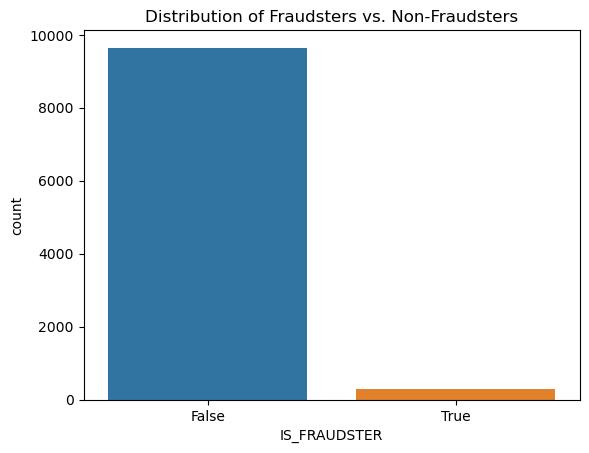

         HAS_EMAIL   BIRTH_YEAR  FAILED_SIGN_IN_ATTEMPTS
count  9944.000000  9944.000000              9944.000000
mean      0.946702  1983.553298                 0.008045
std       0.224639    11.350379                 0.129737
min       0.000000  1927.000000                 0.000000
25%       1.000000  1978.000000                 0.000000
50%       1.000000  1986.000000                 0.000000
75%       1.000000  1992.000000                 0.000000
max       1.000000  2000.000000                 6.000000


In [65]:
# Check the distribution of the target variable
sns.countplot(x='IS_FRAUDSTER', data=users)
plt.title('Distribution of Fraudsters vs. Non-Fraudsters')
plt.show()

# Summary statistics for numeric features in users dataset
print(users.describe())

In [66]:
# Handle missing values by filling or dropping
users['TERMS_VERSION'].fillna('unknown', inplace=True)

# Feature: Account Age in days
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'])
users['ACCOUNT_AGE'] = (datetime.now() - users['CREATED_DATE']).dt.days

# Feature: Transactions per user
transactions_per_user = transactions.groupby('USER_ID').size().reset_index(name='TRANSACTION_COUNT')

# Feature: Average Transaction Amount per user
avg_transaction_amount = transactions.groupby('USER_ID')['AMOUNT'].mean().reset_index(name='AVG_TRANSACTION_AMOUNT')

# Feature: Number of distinct merchant categories
merchant_categories_per_user = transactions.groupby('USER_ID')['MERCHANT_CATEGORY'].nunique().reset_index(name='UNIQUE_MERCHANT_CATEGORIES')

# Feature: Total failed sign-in attempts
failed_sign_in_attempts = users[['ID', 'FAILED_SIGN_IN_ATTEMPTS']]

# Merge the new features into the users dataframe
users = users.merge(transactions_per_user, left_on='ID', right_on='USER_ID', how='left').fillna(0)
users = users.merge(avg_transaction_amount, left_on='ID', right_on='USER_ID', how='left').fillna(0)
users = users.merge(merchant_categories_per_user, left_on='ID', right_on='USER_ID', how='left').fillna(0)

# Drop unnecessary columns after merging
users.drop(columns=['USER_ID_y', 'USER_ID_x'], inplace=True)

# Handle infinite values if any
users.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing numerical values with 0 (though there should be none after this step)
users.fillna(0, inplace=True)

# Final dataset overview
print(users.head())
print(users.info())

                                     ID  HAS_EMAIL   PHONE_COUNTRY  \
0  1872820f-e3ac-4c02-bdc7-727897b60043          1  GB||JE||IM||GG   
1  545ff94d-66f8-4bea-b398-84425fb2301e          1  GB||JE||IM||GG   
2  10376f1a-a28a-4885-8daa-c8ca496026bb          1              ES   
3  fd308db7-0753-4377-879f-6ecf2af14e4f          1              FR   
4  755fe256-a34d-4853-b7ca-d9bb991a86d3          1  GB||JE||IM||GG   

   IS_FRAUDSTER TERMS_VERSION            CREATED_DATE   STATE COUNTRY  \
0         False    2018-05-25 2017-08-06 07:33:33.341  ACTIVE      GB   
1         False    2018-01-01 2017-03-07 10:18:59.427  ACTIVE      GB   
2         False    2018-09-20 2018-05-31 04:41:24.672  ACTIVE      ES   
3         False    2018-05-25 2018-06-01 17:24:23.852  ACTIVE      FR   
4         False    2018-09-20 2017-08-09 15:03:33.945  ACTIVE      GB   

   BIRTH_YEAR     KYC  FAILED_SIGN_IN_ATTEMPTS  ACCOUNT_AGE  \
0        1971  PASSED                        0         2569   
1        1982 

In [70]:
# Convert CREATED_DATE to year, month, and day
users['CREATED_YEAR'] = users['CREATED_DATE'].dt.year
users['CREATED_MONTH'] = users['CREATED_DATE'].dt.month
users['CREATED_DAY'] = users['CREATED_DATE'].dt.day

# Drop the original CREATED_DATE column
users = users.drop(columns=['CREATED_DATE'])

# Identify categorical columns
categorical_features = ['PHONE_COUNTRY', 'TERMS_VERSION', 'STATE', 'COUNTRY', 'KYC']

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Define the model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestClassifier(random_state=42))])

# Split the data into features (X) and target (y)
X = users.drop(columns=['IS_FRAUDSTER', 'ID', 'USER_ID'])
y = users['IS_FRAUDSTER']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.0
ROC AUC Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      2895
        True       1.00      1.00      1.00        89

    accuracy                           1.00      2984
   macro avg       1.00      1.00      1.00      2984
weighted avg       1.00      1.00      1.00      2984



In [71]:
# Check for Class Imbalance
y.value_counts(normalize=True)

IS_FRAUDSTER
False    0.970032
True     0.029968
Name: proportion, dtype: float64

In [73]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation ROC AUC scores:", scores)
print("Mean ROC AUC score:", scores.mean())

Cross-Validation ROC AUC scores: [1. 1. 1. 1. 1.]
Mean ROC AUC score: 1.0


In [74]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[2895    0]
 [   0   89]]
